In [1]:
import sys, os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import CPHelper
import plotting
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import scanpy as sc

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the path to the data directory and model directory
PATH = ["F:/cellpose/full_set"]
MOD_DIR= "F:/cellpose/full_set/train/models"

In [9]:
# Run the prediction	
res = CPHelper.prediction.batch_predict(MOD_DIR,PATH,mute=True,return_results=True,save_masks=False,min_size=-1)

full_set found...


F:/cellpose/full_set/train/: 100%|██████████| 67/67 [06:35<00:00,  5.90s/image]


In [6]:
import pickle
pkl_file = open('res_tSNE.pkl', 'rb')
res = pickle.load(pkl_file)
pkl_file.close()

In [7]:
# Get style vectors and names
all_styles = res['full_set_0']['styles']
all_names = res['full_set_0']['id']

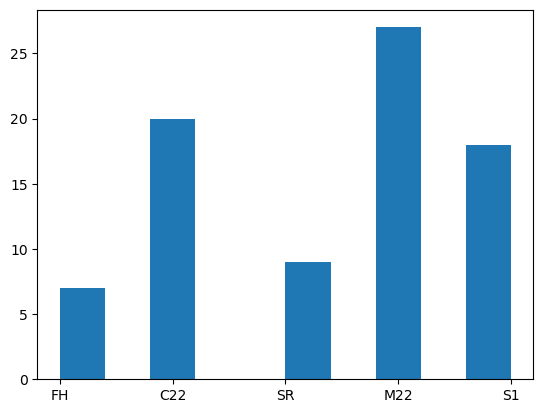

In [8]:
classes = ['C22','M22','FH','SR','S1']
C22_keys = ['kanaka','DS8','deer','hidden']
M22_keys = ['L2','K1','S9']
S1_keys = ['S1']
FH_keys = ['P106']
SR_keys = ['GU','Luet','Rhein','Simme','Thur']
data_classes = []
for idx in range(len(all_names)):
    if any (x in all_names[idx] for x in C22_keys):
        cl_name='C22'
    elif any (x in all_names[idx] for x in M22_keys):
        cl_name='M22'
    elif any (x in all_names[idx] for x in S1_keys):
        cl_name='S1'
    elif any (x in all_names[idx] for x in FH_keys):
        cl_name='FH'
    elif any (x in all_names[idx] for x in SR_keys):
        cl_name='SR'
    else:
        cl_name='unknown'
    data_classes.append(cl_name)
plt.hist(data_classes);


In [9]:
aData = pd.DataFrame(all_styles)
aData.shape

(81, 256)

In [10]:
from scipy.sparse import csc_matrix
sparseMatrix = csc_matrix(all_styles, 
                          dtype = np.float32).toarray()
print(sparseMatrix.shape)
adata=sc.AnnData(sparseMatrix)
adata.obs_names= all_names
adata.obs["class"]=data_classes
print(adata)
print(adata.obs_names[:10])

(81, 256)
AnnData object with n_obs × n_vars = 81 × 256
    obs: 'class'
Index(['4_P1060348_3', 'DS8-S2_3', 'GU_bar7_0', 'K1_2_C1_DJI_0385_clipped_4',
       'L2_1_C1_DJI_0371_3', 'S1_a_DJI_0003_2_0', 'S1_g_DJI_0171_2_0',
       'S1_g_DJI_0171_2_3', 'S1_g_DJI_0208_2_6', 'S9_5_C1_DJI_0102_2'],
      dtype='object')


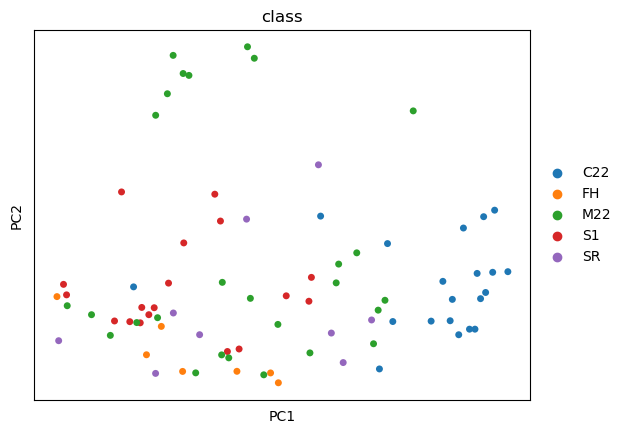

In [11]:
sc.tl.pca(adata)
sc.pl.pca(adata,color='class',size=100)

[0.32434473 0.22665152]


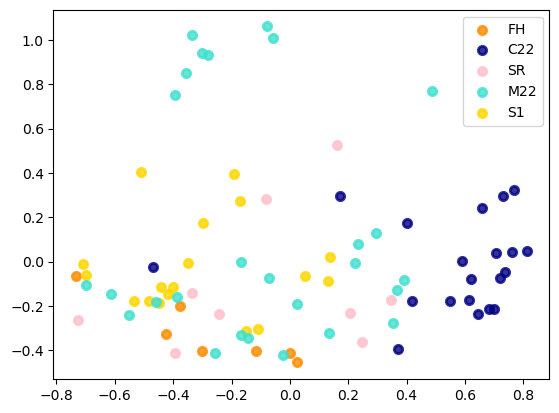

In [12]:
#sanity check with sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(all_styles)
print(pca.explained_variance_ratio_)
X=pca.transform(all_styles)

colors = ["navy", "turquoise", "darkorange","pink","gold"]
target_names = ['C22','M22','FH','SR','S1']

lw = 2
for point in range(len(X)):
    if data_classes[point]=='C22':
        c=colors[0]
    elif data_classes[point]=='M22':
        c=colors[1]
    elif data_classes[point]=='FH':
        c=colors[2]
    elif data_classes[point]=='SR':
        c=colors[3]
    elif data_classes[point]=='S1':
        c=colors[4]
    else:
        c='black'
    plt.scatter(X[point, 0], X[point, 1],color=c, alpha=.8, lw=lw,label=data_classes[point])

from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());

[0.32434473 0.22665152 0.09463375]


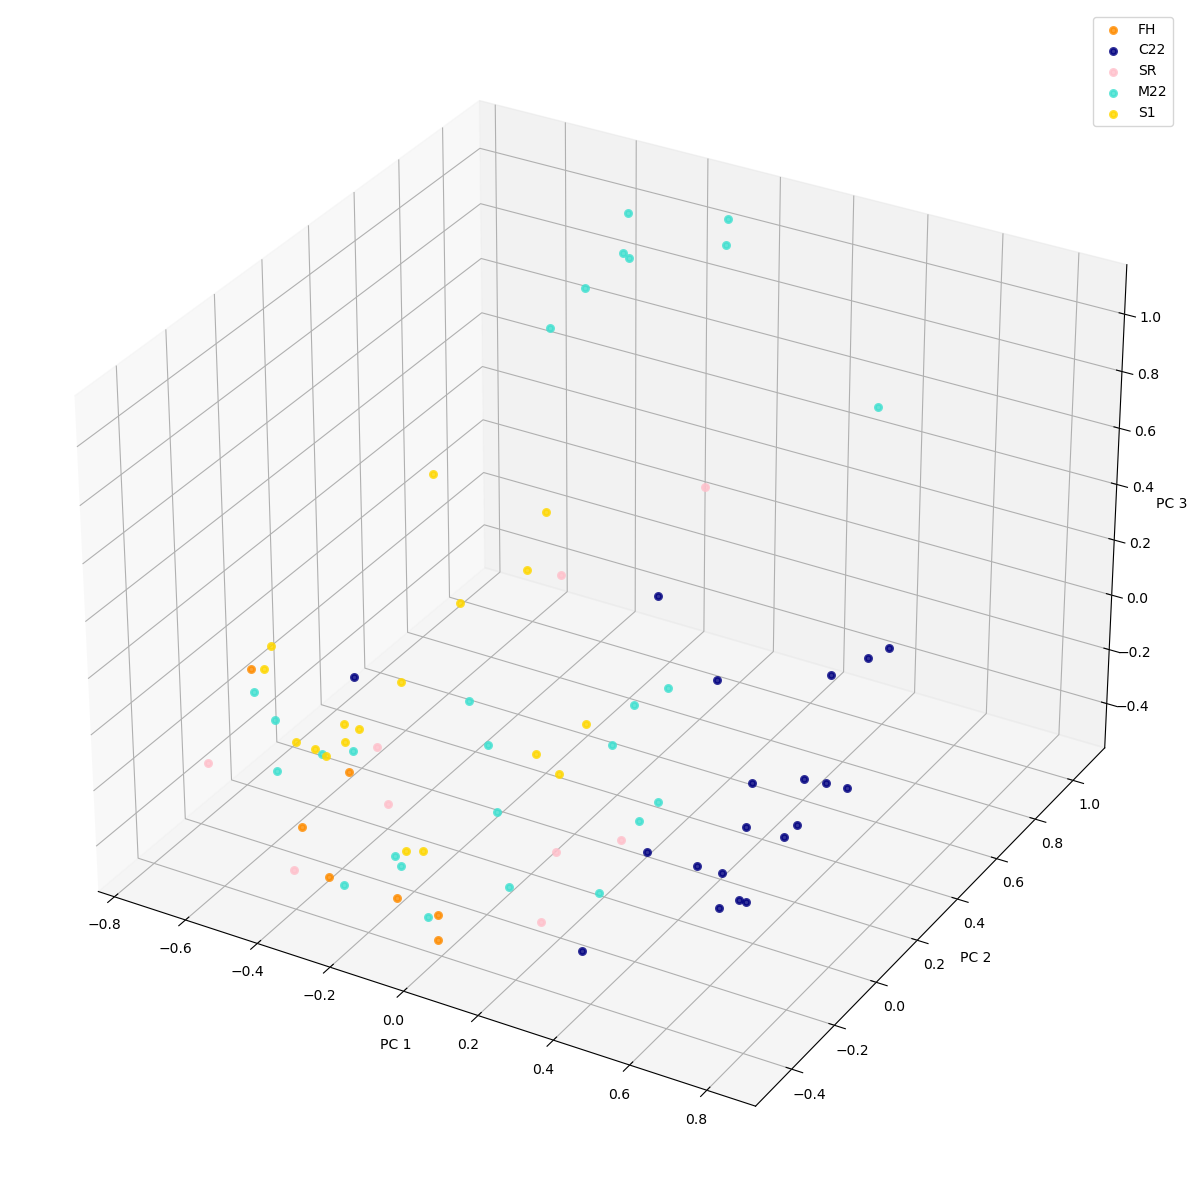

In [26]:
pca = PCA(n_components=3)
pca.fit(all_styles)
print(pca.explained_variance_ratio_)
X=pca.transform(all_styles)

colors = ["navy", "turquoise", "darkorange","pink","gold"]
target_names = ['C22','M22','FH','SR','S1']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

lw = 2
for point in range(len(X)):
    if data_classes[point]=='C22':
        c=colors[0]
    elif data_classes[point]=='M22':
        c=colors[1]
    elif data_classes[point]=='FH':
        c=colors[2]
    elif data_classes[point]=='SR':
        c=colors[3]
    elif data_classes[point]=='S1':
        c=colors[4]
    else:
        c='black'
    ax.scatter(X[point, 0], X[point, 1],X[point, 1],color=c, alpha=.8, lw=lw,label=data_classes[point])

from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys());
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.tight_layout();

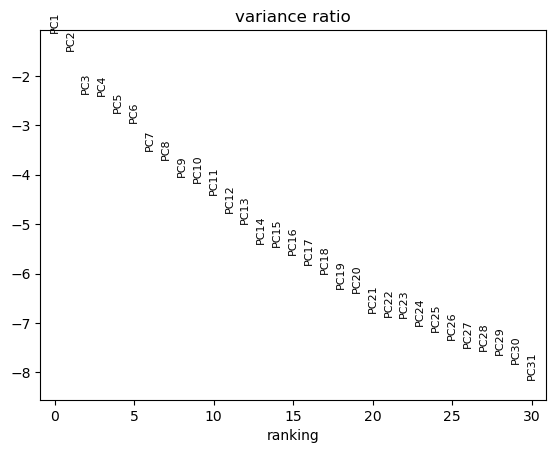

In [452]:
sc.pl.pca_variance_ratio(adata, log=True,)

In [455]:
sc.pp.neighbors(adata, n_neighbors=100, n_pcs=40)

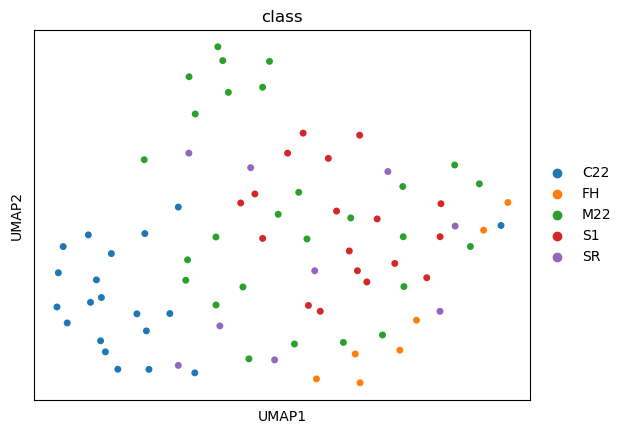

In [457]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='class', use_raw=False,size=100)

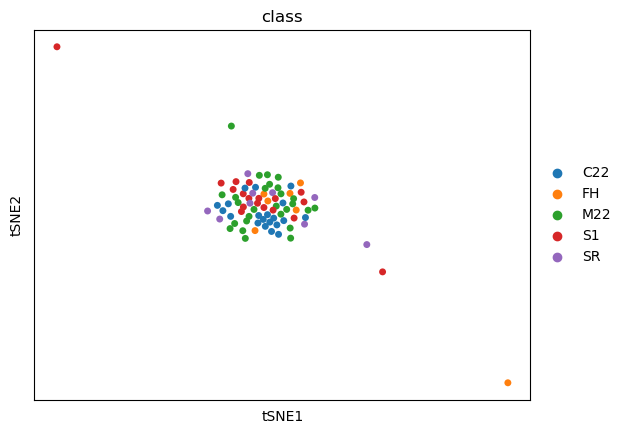

AnnData object with n_obs × n_vars = 81 × 256
    obs: 'class'
    uns: 'pca', 'class_colors', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [458]:
sc.tl.tsne(adata)
sc.pl.tsne(adata,color='class',size=100)
print(adata)

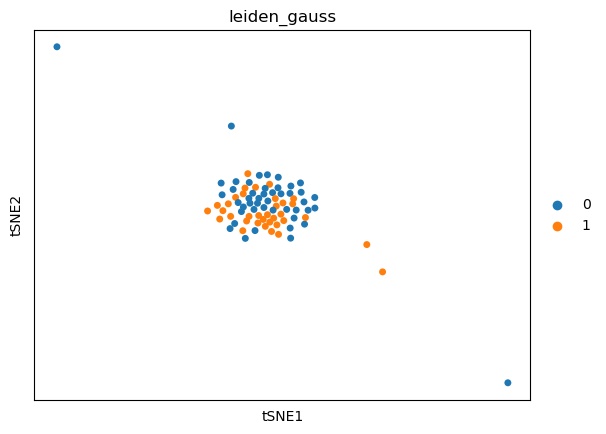

0    46
1    35
Name: leiden_gauss, dtype: int64


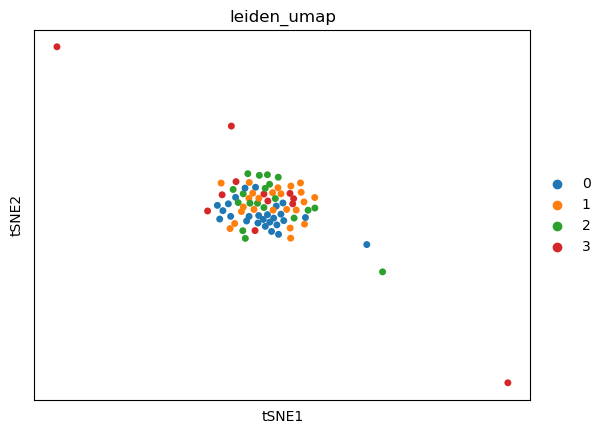

0    26
1    24
2    19
3    12
Name: leiden_umap, dtype: int64


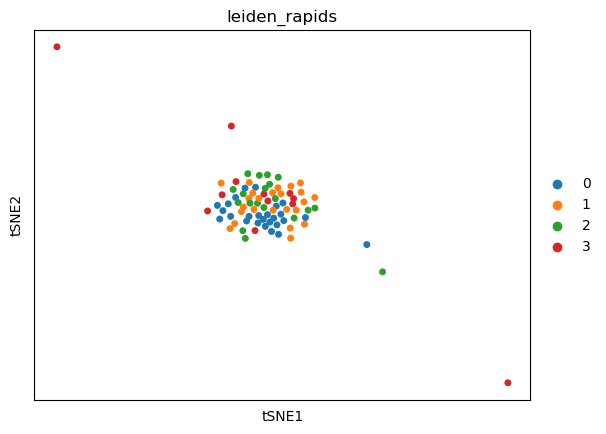

0    26
1    24
2    19
3    12
Name: leiden_rapids, dtype: int64


In [400]:
method_l = ['gauss','umap','rapids']
for k in range(3):
    #neighborhood graph https://scanpy.readthedocs.io/en/latest/generated/scanpy.pp.neighbors.html#scanpy-pp-neighbors
    sc.pp.neighbors(adata, n_neighbors=41, n_pcs=40,method=method_l[k],key_added=str(method_l[k])+'_neighbors')
    #clustering using the leiden algorithm https://scanpy.readthedocs.io/en/latest/generated/scanpy.tl.leiden.html#scanpy-tl-leiden
    sc.tl.leiden(adata, resolution=0.8, neighbors_key=str(method_l[k])+'_neighbors',key_added='leiden_'+str(method_l[k]))
    #plotting the clusters
    sc.pl.tsne(adata, color=['leiden_'+str(method_l[k])],size=100)
    print(adata.obs['leiden_'+str(method_l[k])].value_counts())